## Read the results of the adversarial robustness experiments

In [1]:
import seml
from pathlib import Path
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
from src.dataset.counting_algorithm import subgraph_counting, subgraph_counting_all

experiment_name = 'GIN_adversaial_robustness'
loss = 'l1'
results: pd.DataFrame = seml.get_results(experiment_name, to_data_frame=True)
results = results.rename(columns={'result.test_error': 'Test', 'result.adversarial_error': 'Adversarial', 'result.subgraph': 'Subgraph', 'result.cross_adversarial_errors_average': 'Cross adversarial'})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

/home/francesco/miniconda3/envs/thesis/lib/python3.10/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [2]:
sns.set_style("dark")
font_dirs = ['/home/francesco/.local/share/fonts']
font_files = mpl.font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    mpl.font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Linux Libertine'
plt.rcParams['font.size'] = 14
if loss == 'l1':
    loss_name = 'MAE'
elif loss =='l1_count':
    loss_name = 'MAE/count'

## 50 nodes graphs

Analyze the results for the 50 nodes graphs.

In [3]:

results_50 = results[results["result.dataset"] == "test_10000_er_50"] # extrac the 50 nodes results
print()
results_50 = results_50[results_50["config.loss"] == loss]

results_50_1 = pd.melt(frame=results_50, id_vars=["result.graph", 'Subgraph', 'result.seed', 'result.architecture'], value_vars=['Test', 'Adversarial', 'Cross adversarial'], var_name='Dataset', value_name=loss_name)
subgraphs = results_50_1["Subgraph"].unique()
fig, axes = plt.subplots(1, len(subgraphs), constrained_layout=True)
fig.set_figwidth(16)
fig.set_figheight(4.5)
fig.set_dpi(400)
fig.suptitle("Aversarial robsutness GIN 50 nodes budget 5", fontsize = 20)

for i, subgraph in enumerate(subgraphs):
    data = results_50_1[results_50_1['Subgraph']==subgraph]
    
    sns.violinplot(data=data, x="Subgraph", y=loss_name, hue='Dataset', showfliers = False, ax=axes[i], )
    #sns.despine()
    if i != 0:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(loc=1)


plt.show()

    
    


KeyError: 'result.dataset'

findfont: Font family ['Linux Libertine'] not found. Falling back to DejaVu Sans.


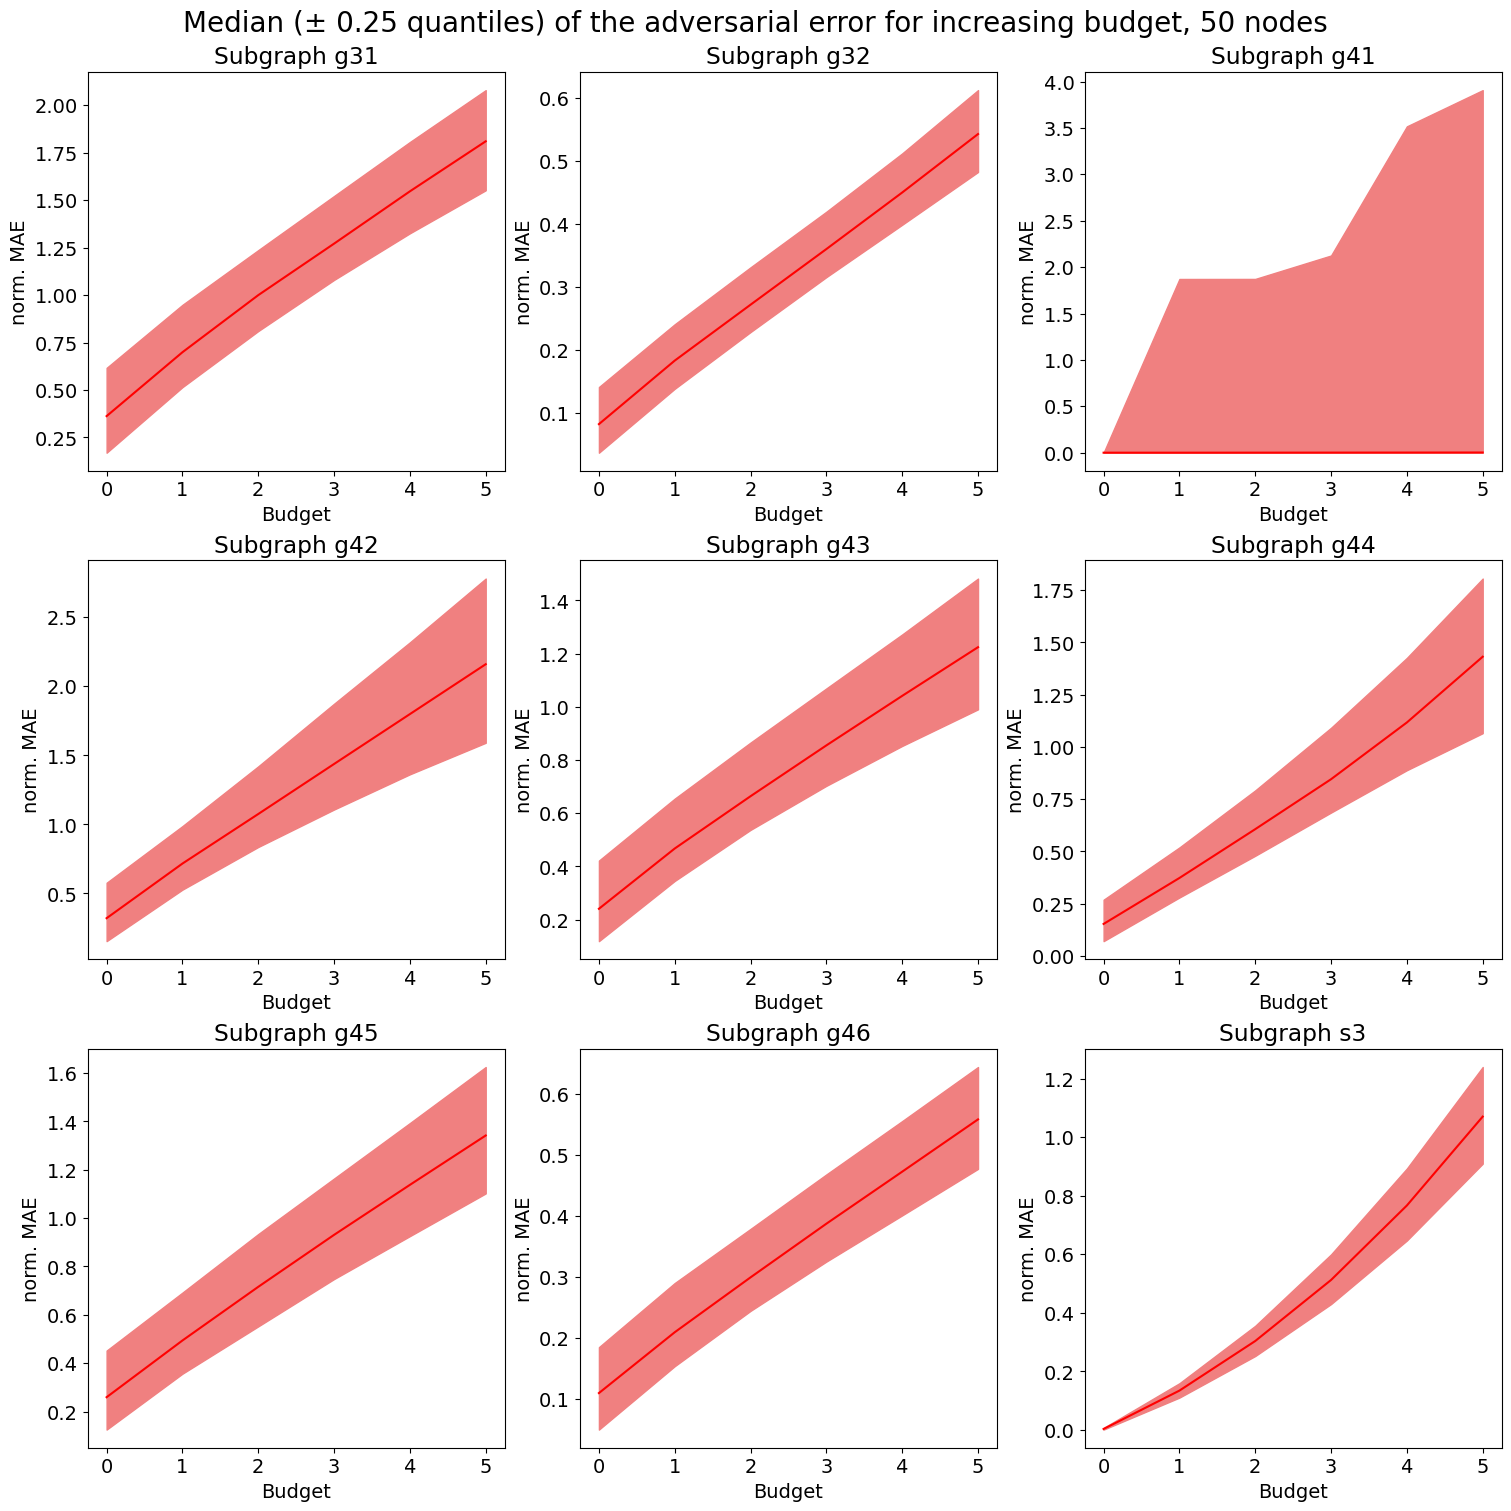

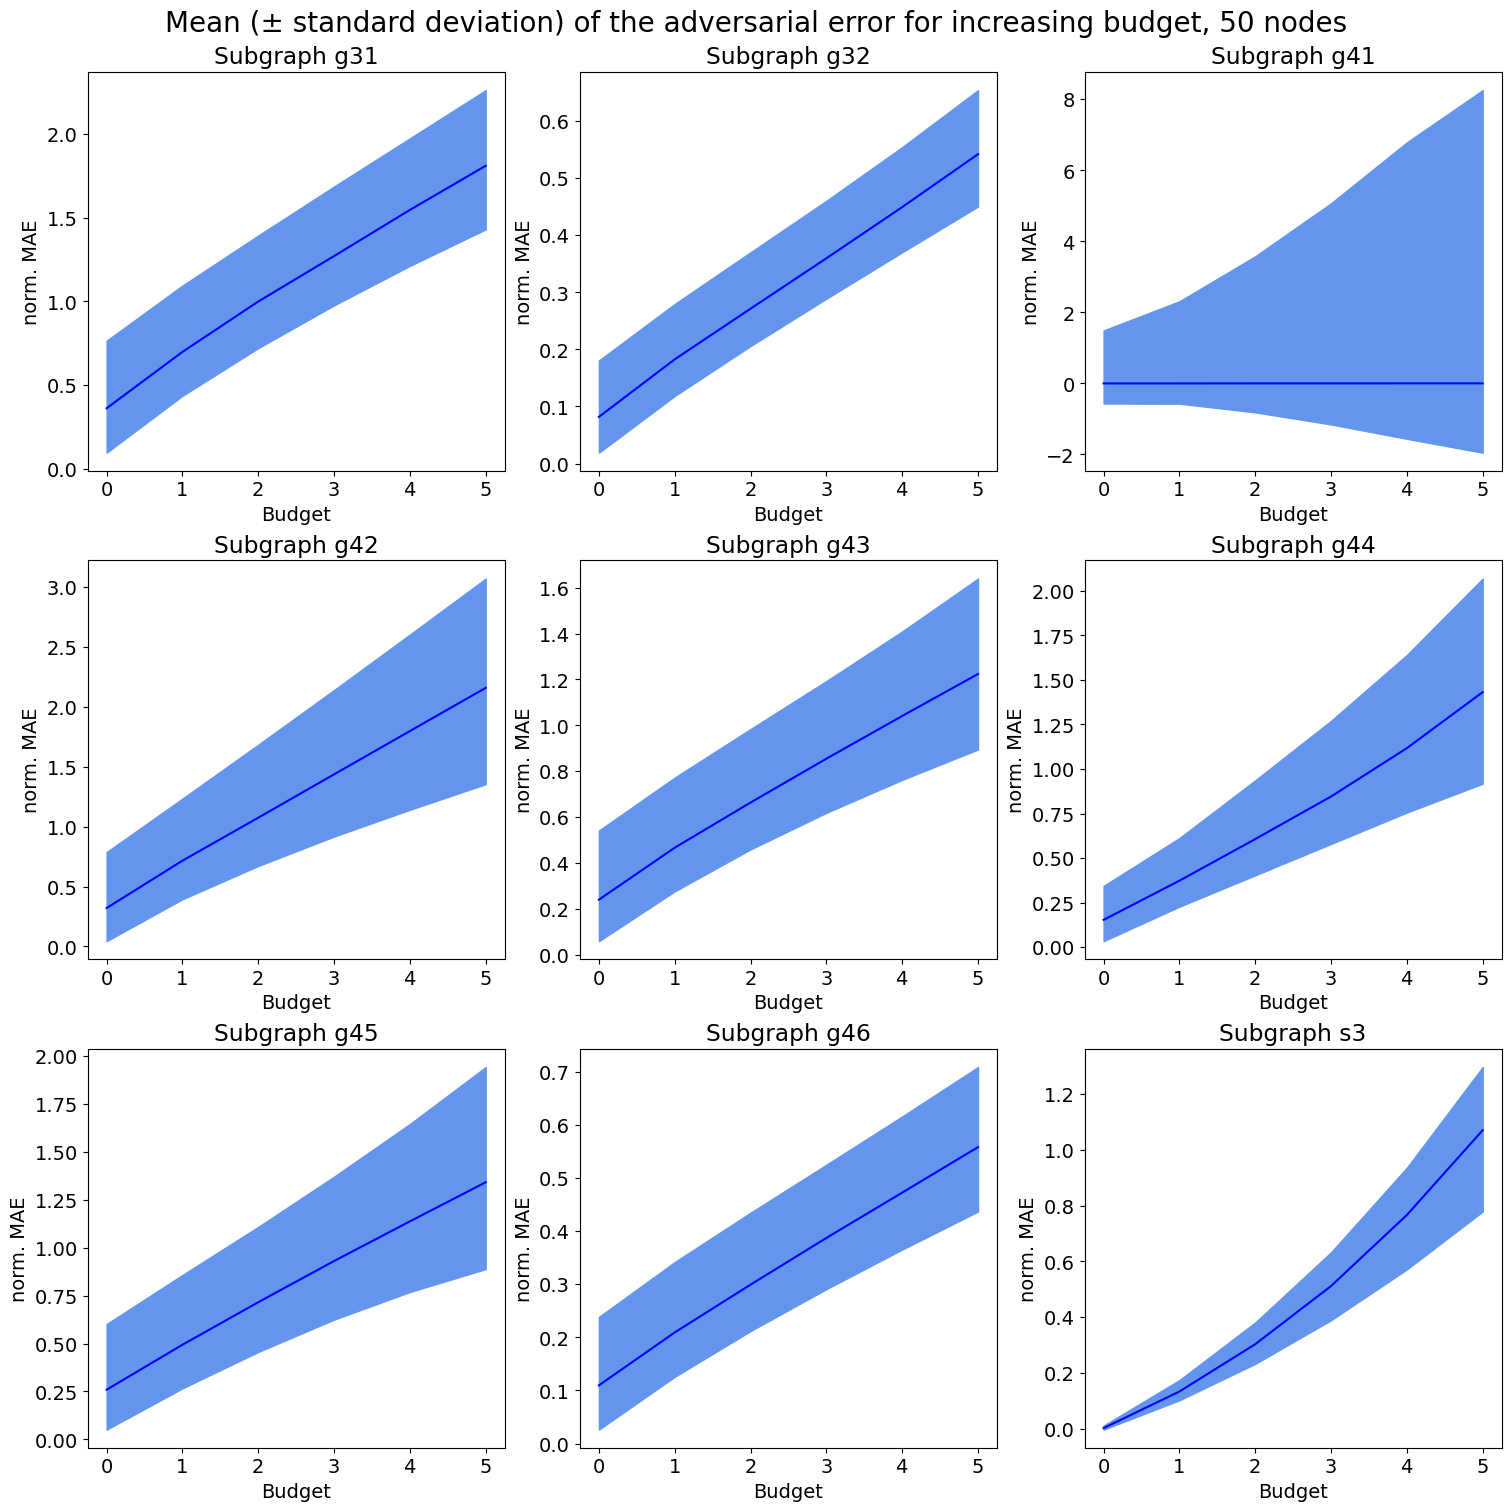

In [ ]:
results_50_2 = results_50[results_50["config.loss"]==loss]
budget = results_50["config.budget"].iloc[0]
subgraphs = results_50["Subgraph"].unique()
fig_1, axes_1 = plt.subplots(3,3,constrained_layout=True)
fig_1.set_figwidth(15)
fig_1.set_figheight(15)
fig_1.suptitle("Median (± 0.25 quantiles) of the adversarial error for increasing budget, 50 nodes", fontsize = 20)
fig_2, axes_2 = plt.subplots(3,3, constrained_layout=True)
fig_2.set_figwidth(15)
fig_2.set_figheight(15)
fig_2.suptitle("Mean (± standard deviation) of the adversarial error for increasing budget, 50 nodes", fontsize = 20)
for j, subgraph in enumerate(subgraphs):
    results_50_s = results_50[results_50["Subgraph"] == subgraph]
    err_mean = np.empty(budget+1, dtype=float)
    err_median = np.empty(budget+1, dtype=float)
    err_high_quant = np.empty(budget+1, dtype=float)
    err_low_quant = np.empty(budget+1, dtype=float)
    err_std = np.empty(budget+1, dtype=float)
    for i in range(budget+1):
        err = results_50_s['result.adversarial_error_history'].apply(lambda l: l[min(i, len(l)-1)])
        err_mean[i] = err.mean()
        err_median[i] = err.median()
        err_std[i] = err.std()
        err_high_quant[i] = err.quantile(0.75)
        err_low_quant[i] = err.quantile(0.25)
    x = list(range(budget+1))
    # median 
    axes_1[j//3][j%3].plot(x, err_median, color = 'r')
    axes_1[j//3][j%3].fill_between(x, err_high_quant, err_low_quant, color = 'lightcoral')
    axes_1[j//3][j%3].set_xlabel('Budget')
    axes_1[j//3][j%3].set_ylabel(loss_name)
    axes_1[j//3][j%3].set_title(f'Subgraph {subgraph}')
    axes_1[j//3][j%3]
    # mean ± standard deviation
    axes_2[j//3][j%3].plot(x, err_median, color = 'b')
    axes_2[j//3][j%3].fill_between(x, err_mean + err_std, err_mean - err_std, color = 'cornflowerblue')
    axes_2[j//3][j%3].set_xlabel('Budget')
    axes_2[j//3][j%3].set_ylabel(loss_name)
    axes_2[j//3][j%3].set_title(f'Subgraph {subgraph}')
plt.show()
    

## 10 nodes graphs

Analyze the results for the 10 nodes graphs.

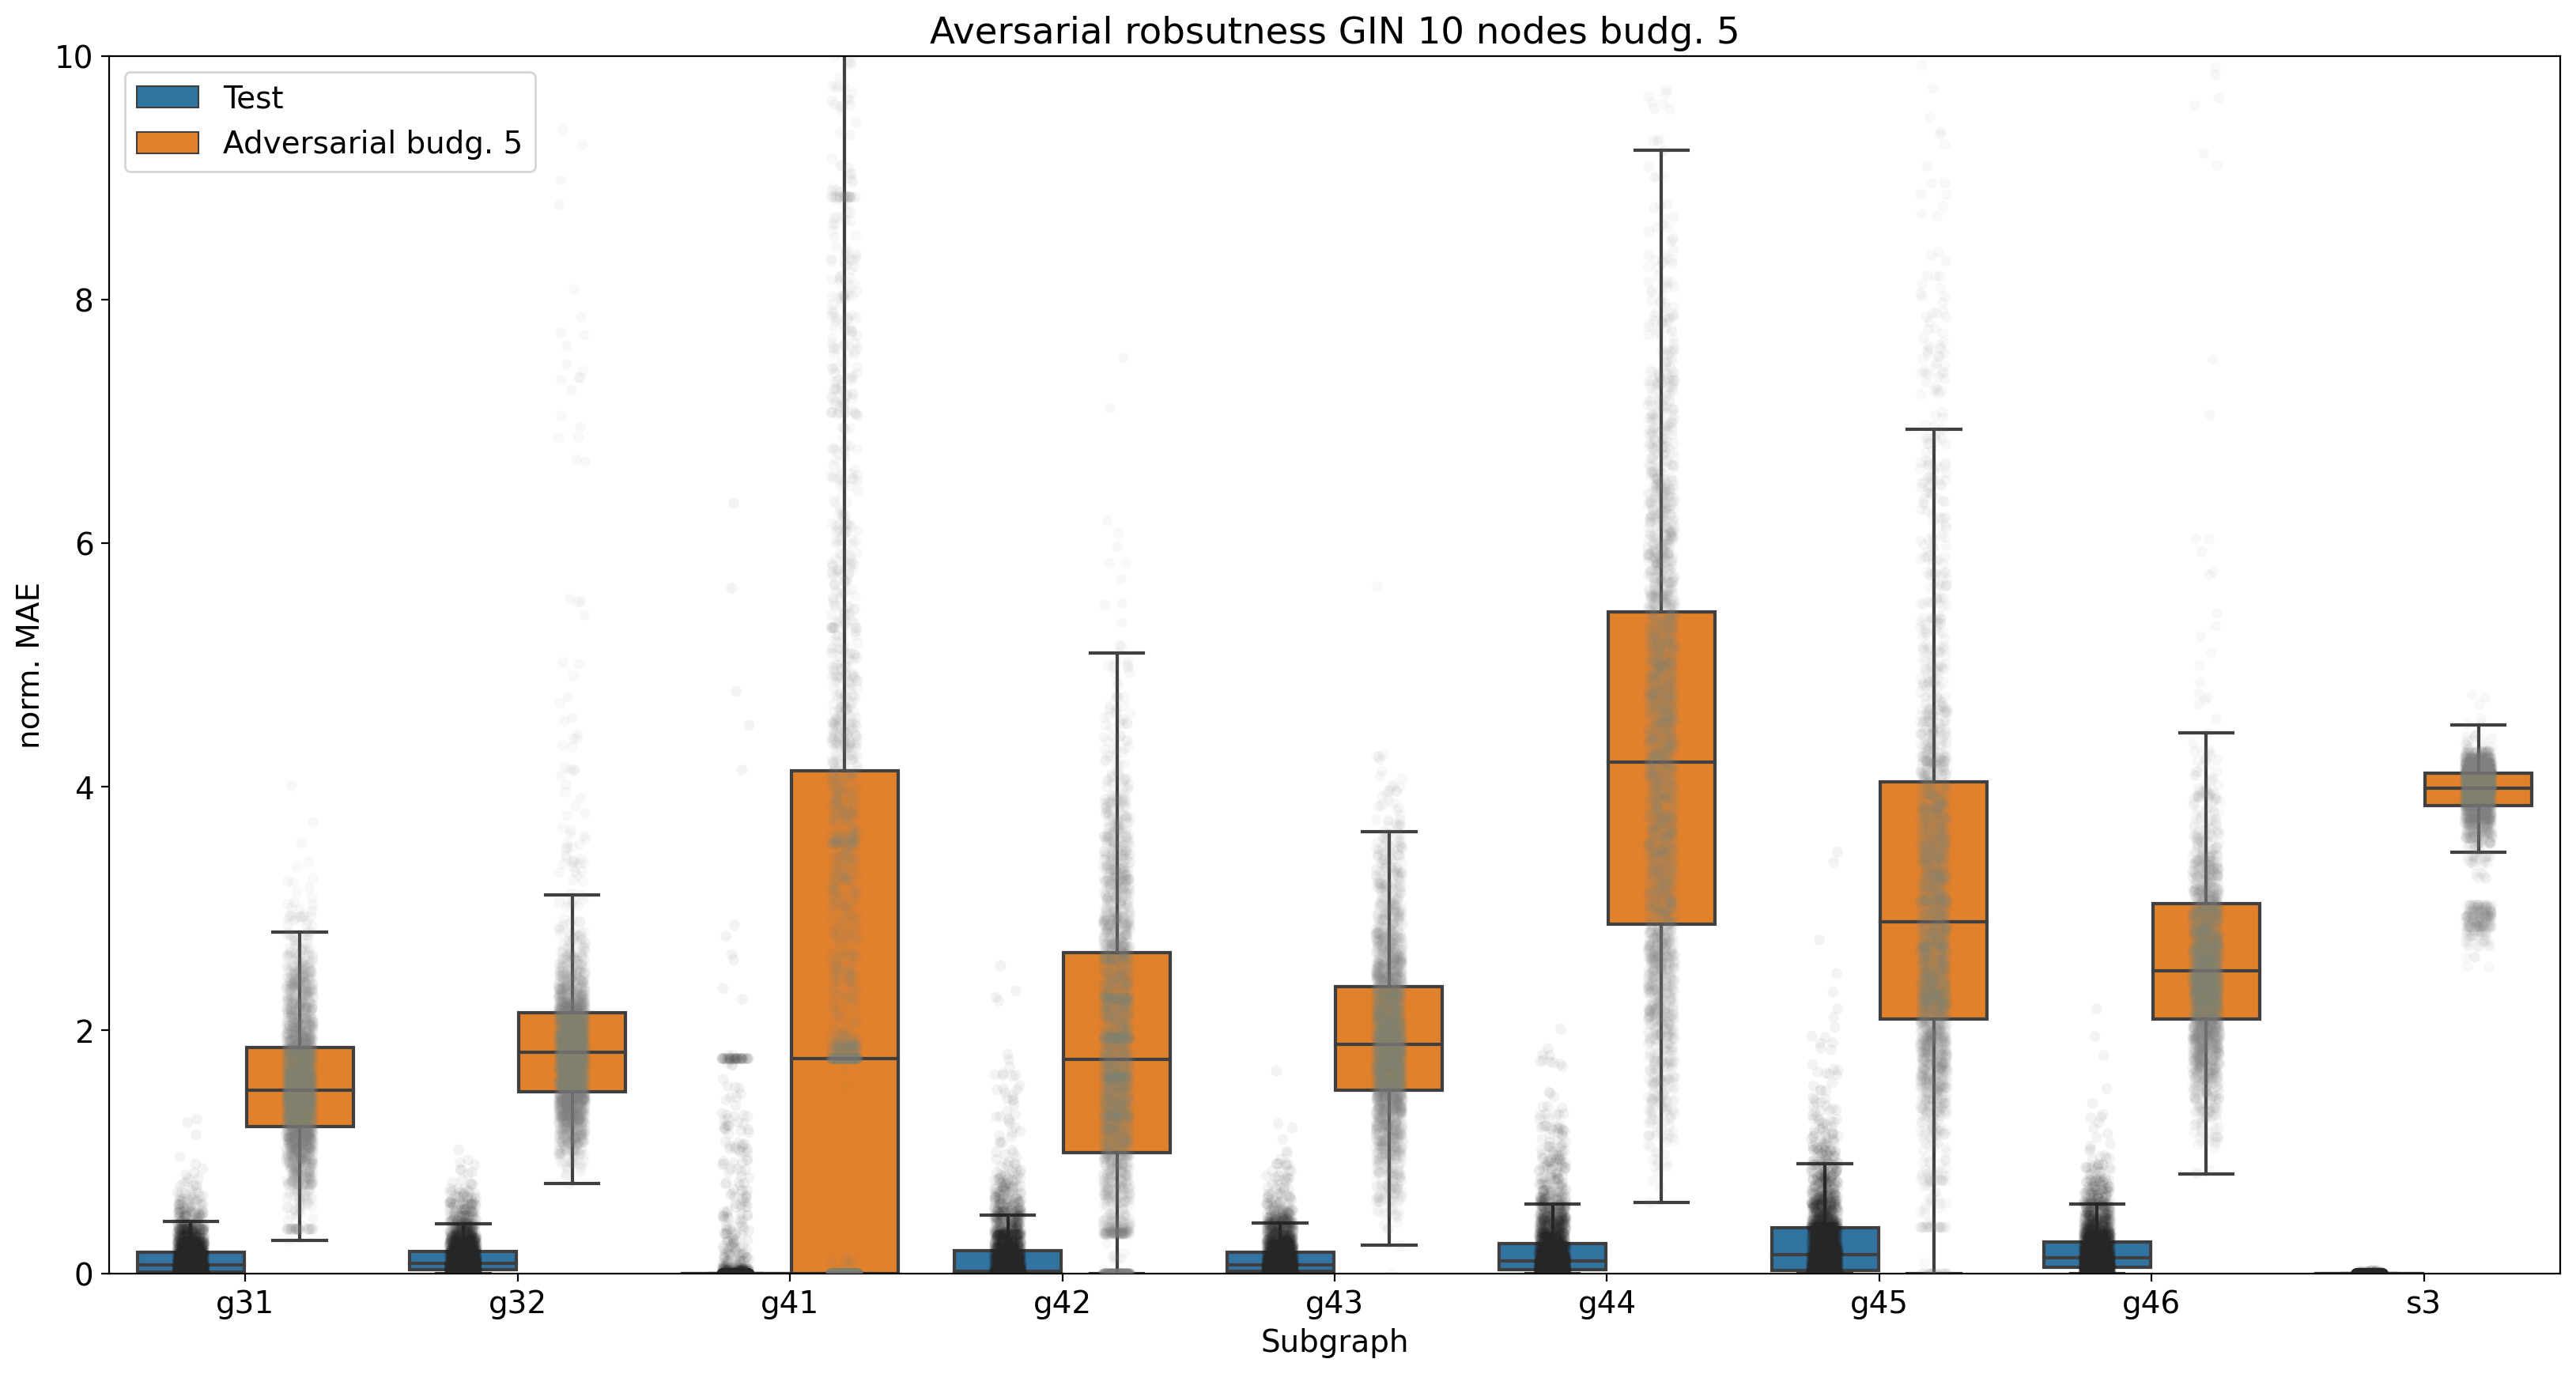

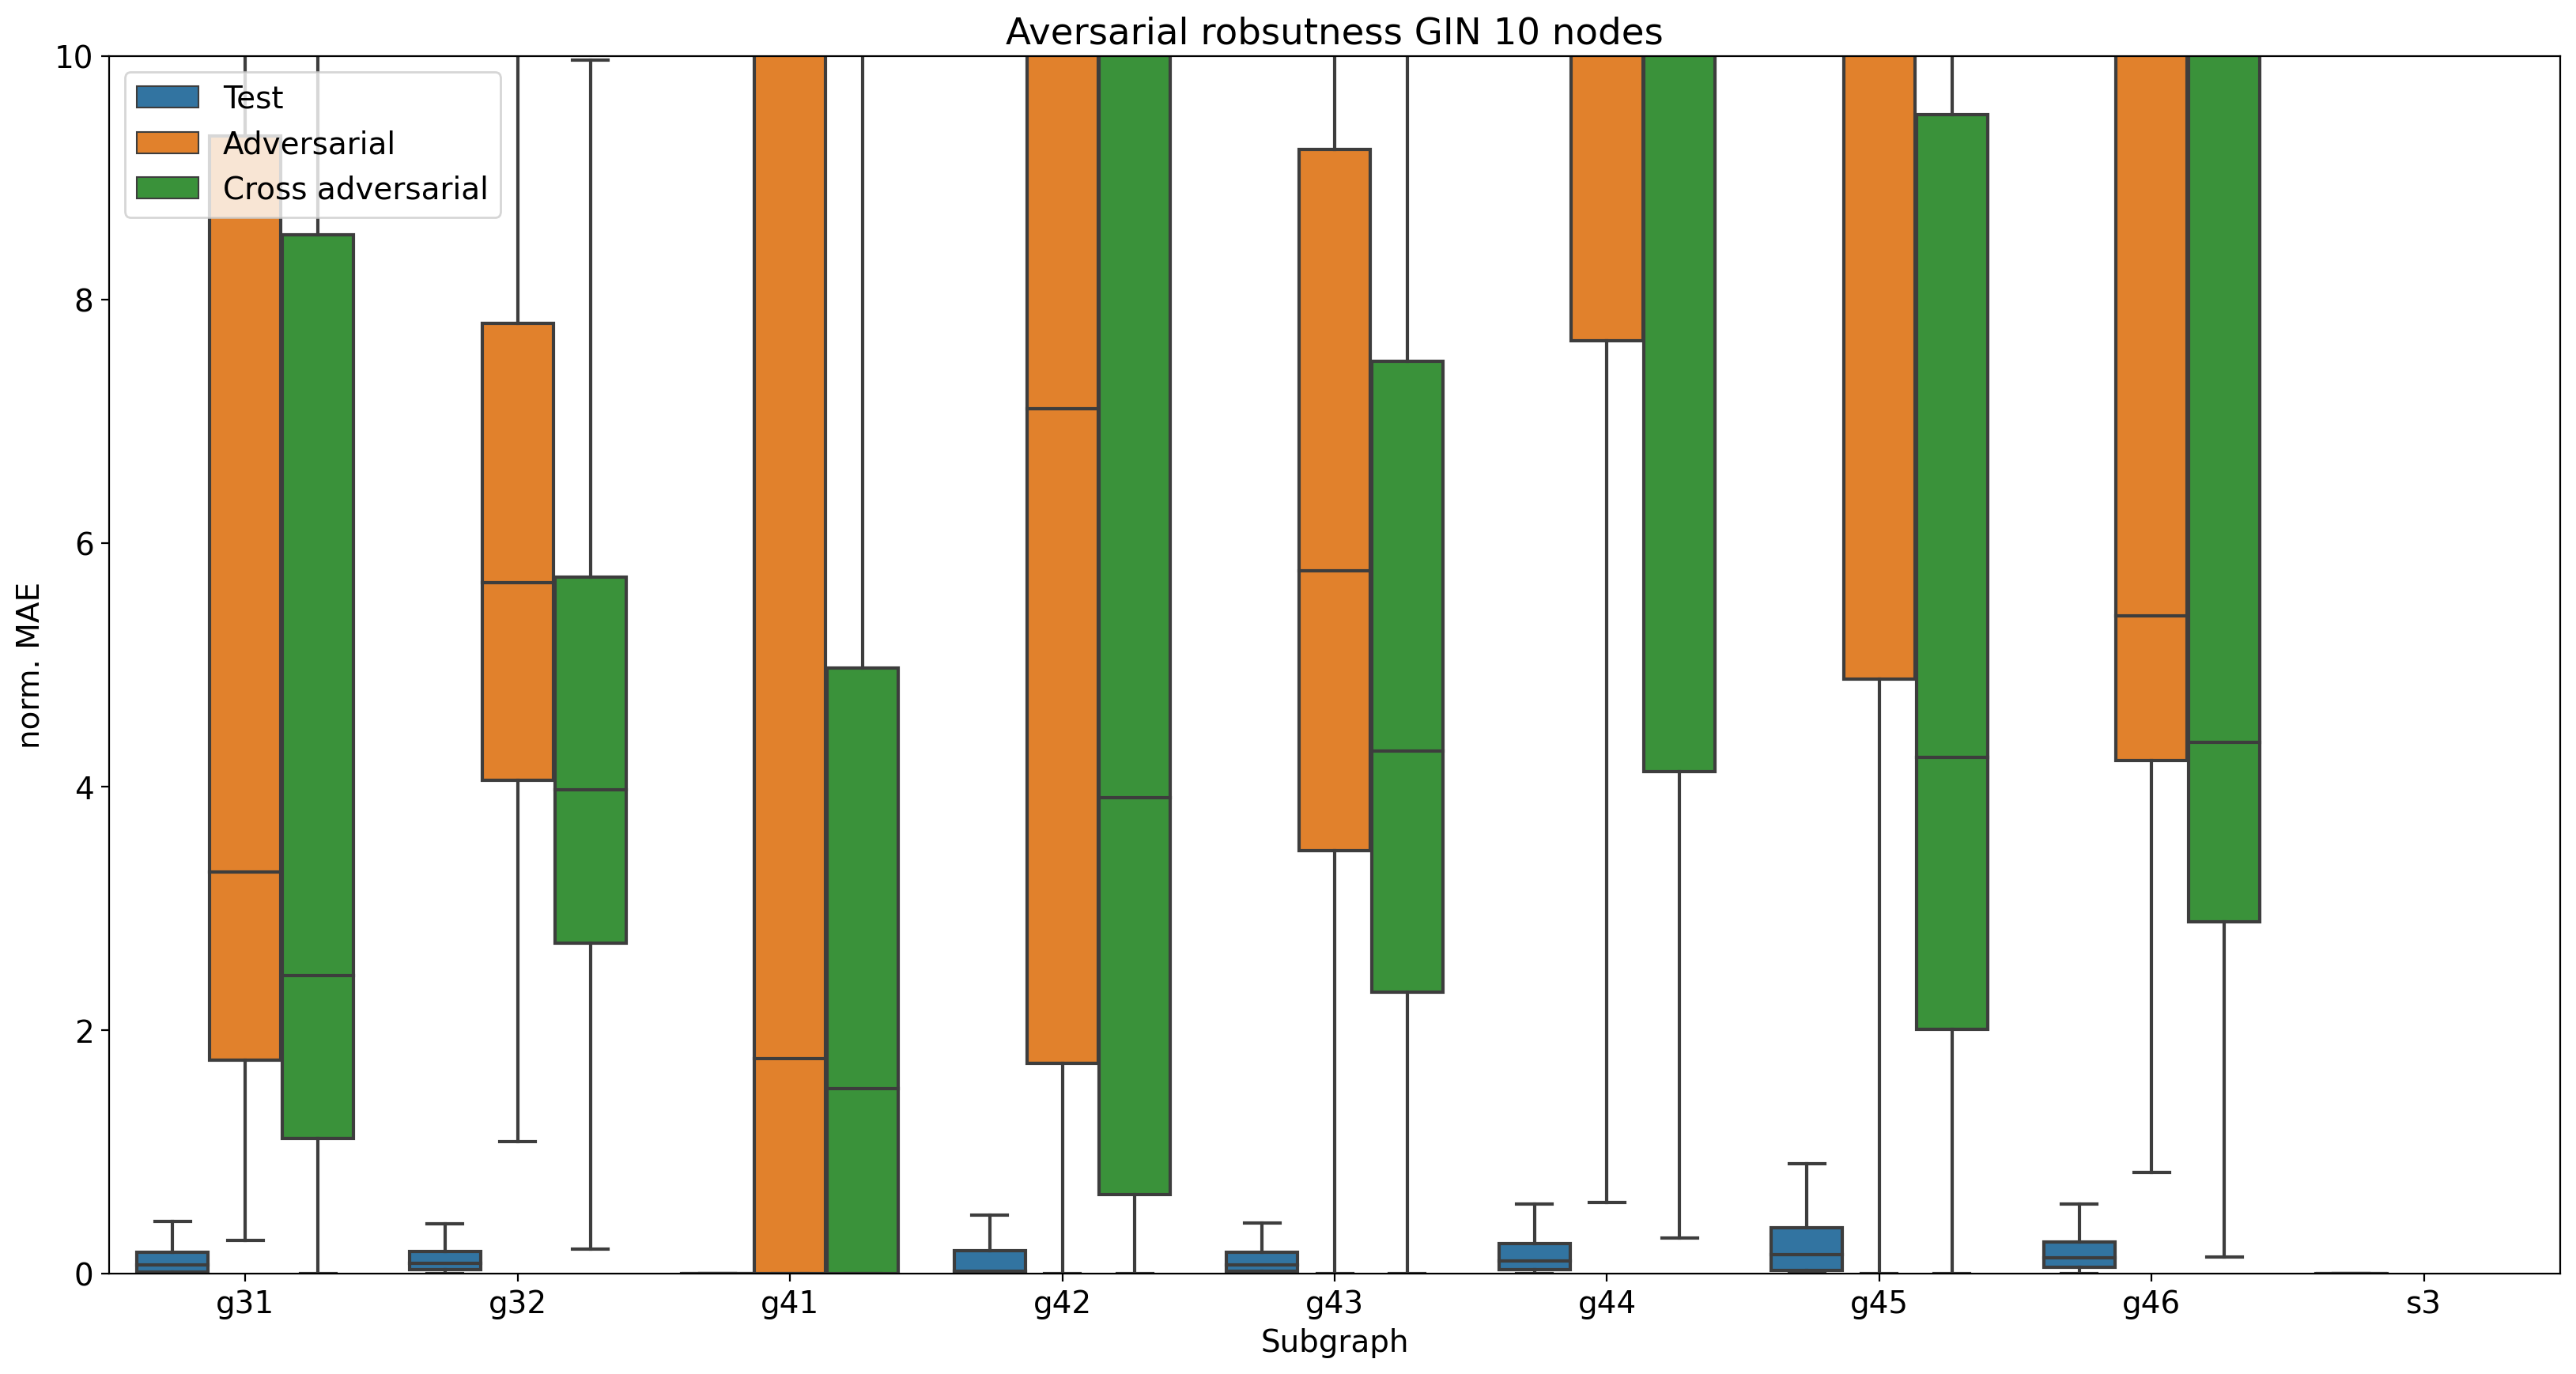

In [ ]:
results_10 = results[results["result.dataset"] == "test_10000_er_10"] # extrac the 10 nodes results
results_10 = results_10[results_10["config.loss"] == loss]
results_10.loc[:,'Adversarial budg. 5'] = results_10['result.adversarial_error_history'].apply(lambda l: l[min(5, len(l)-1)])
results_10.loc[:,'Adversarial budg. 10'] = results_10['result.adversarial_error_history'].apply(lambda l: l[min(10, len(l)-1)])

results_10_1 = pd.melt(frame=results_10, id_vars=["result.graph", 'Subgraph', 'result.seed', 'result.architecture'], value_vars=['Test', 'Adversarial budg. 5'], var_name='Dataset', value_name=loss_name)
subgraphs = results_10_1["Subgraph"].unique()
fig, axes = plt.subplots(1, len(subgraphs), constrained_layout=True)
fig.set_figwidth(16)
fig.set_figheight(4.5)
fig.set_dpi(400)
fig.suptitle("Aversarial robsutness GIN 10 nodes budget 5", fontsize = 20)

for i, subgraph in enumerate(subgraphs):
    data = results_10_1[results_10_1['Subgraph']==subgraph]
    
    sns.violinplot(data=data, x="Subgraph", y=loss_name, hue='Dataset', showfliers = False, ax=axes[i], )
    #sns.despine()
    if i != 0:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(loc=1)
plt.show()

results_10_2 = pd.melt(frame=results_10, id_vars=["result.graph", 'Subgraph', 'result.seed', 'result.architecture'], value_vars=['Test', 'Adversarial budg. 10'], var_name='Dataset', value_name=loss_name)
subgraphs = results_10_2["Subgraph"].unique()
fig, axes = plt.subplots(1, len(subgraphs), constrained_layout=True)
fig.set_figwidth(16)
fig.set_figheight(4.5)
fig.set_dpi(400)
fig.suptitle("Aversarial robsutness GIN 10 nodes budget 10", fontsize = 20)

for i, subgraph in enumerate(subgraphs):
    data = results_10_2[results_10_2['Subgraph']==subgraph]
    
    sns.violinplot(data=data, x="Subgraph", y=loss_name, hue='Dataset', showfliers = False, ax=axes[i], )
    #sns.despine()
    if i != 0:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(loc=1)
plt.show()

results_10_3 = pd.melt(frame=results_10, id_vars=["result.graph", 'Subgraph', 'result.seed', 'result.architecture'], value_vars=['Test', 'Adversarial', 'Cross adversarial'], var_name='Dataset', value_name=loss_name)
subgraphs = results_10_3["Subgraph"].unique()
fig, axes = plt.subplots(1, len(subgraphs), constrained_layout=True)
fig.set_figwidth(32)
fig.set_figheight(9)
fig.set_dpi(400)
fig.suptitle("Aversarial robsutness GIN 10 nodes budget 40", fontsize = 20)

for i, subgraph in enumerate(subgraphs):
    data = results_10_3[results_10_3['Subgraph']==subgraph]
    
    sns.violinplot(data=data, x="Subgraph", y=loss_name, hue='Dataset', showfliers = False, ax=axes[i], )
    #sns.despine()
    if i != 0:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(loc=1)
plt.show()

For the 10 nodes graphs the budget used is very high, hence we can also analyze the behaviour of the adversarial error while the budget increases.

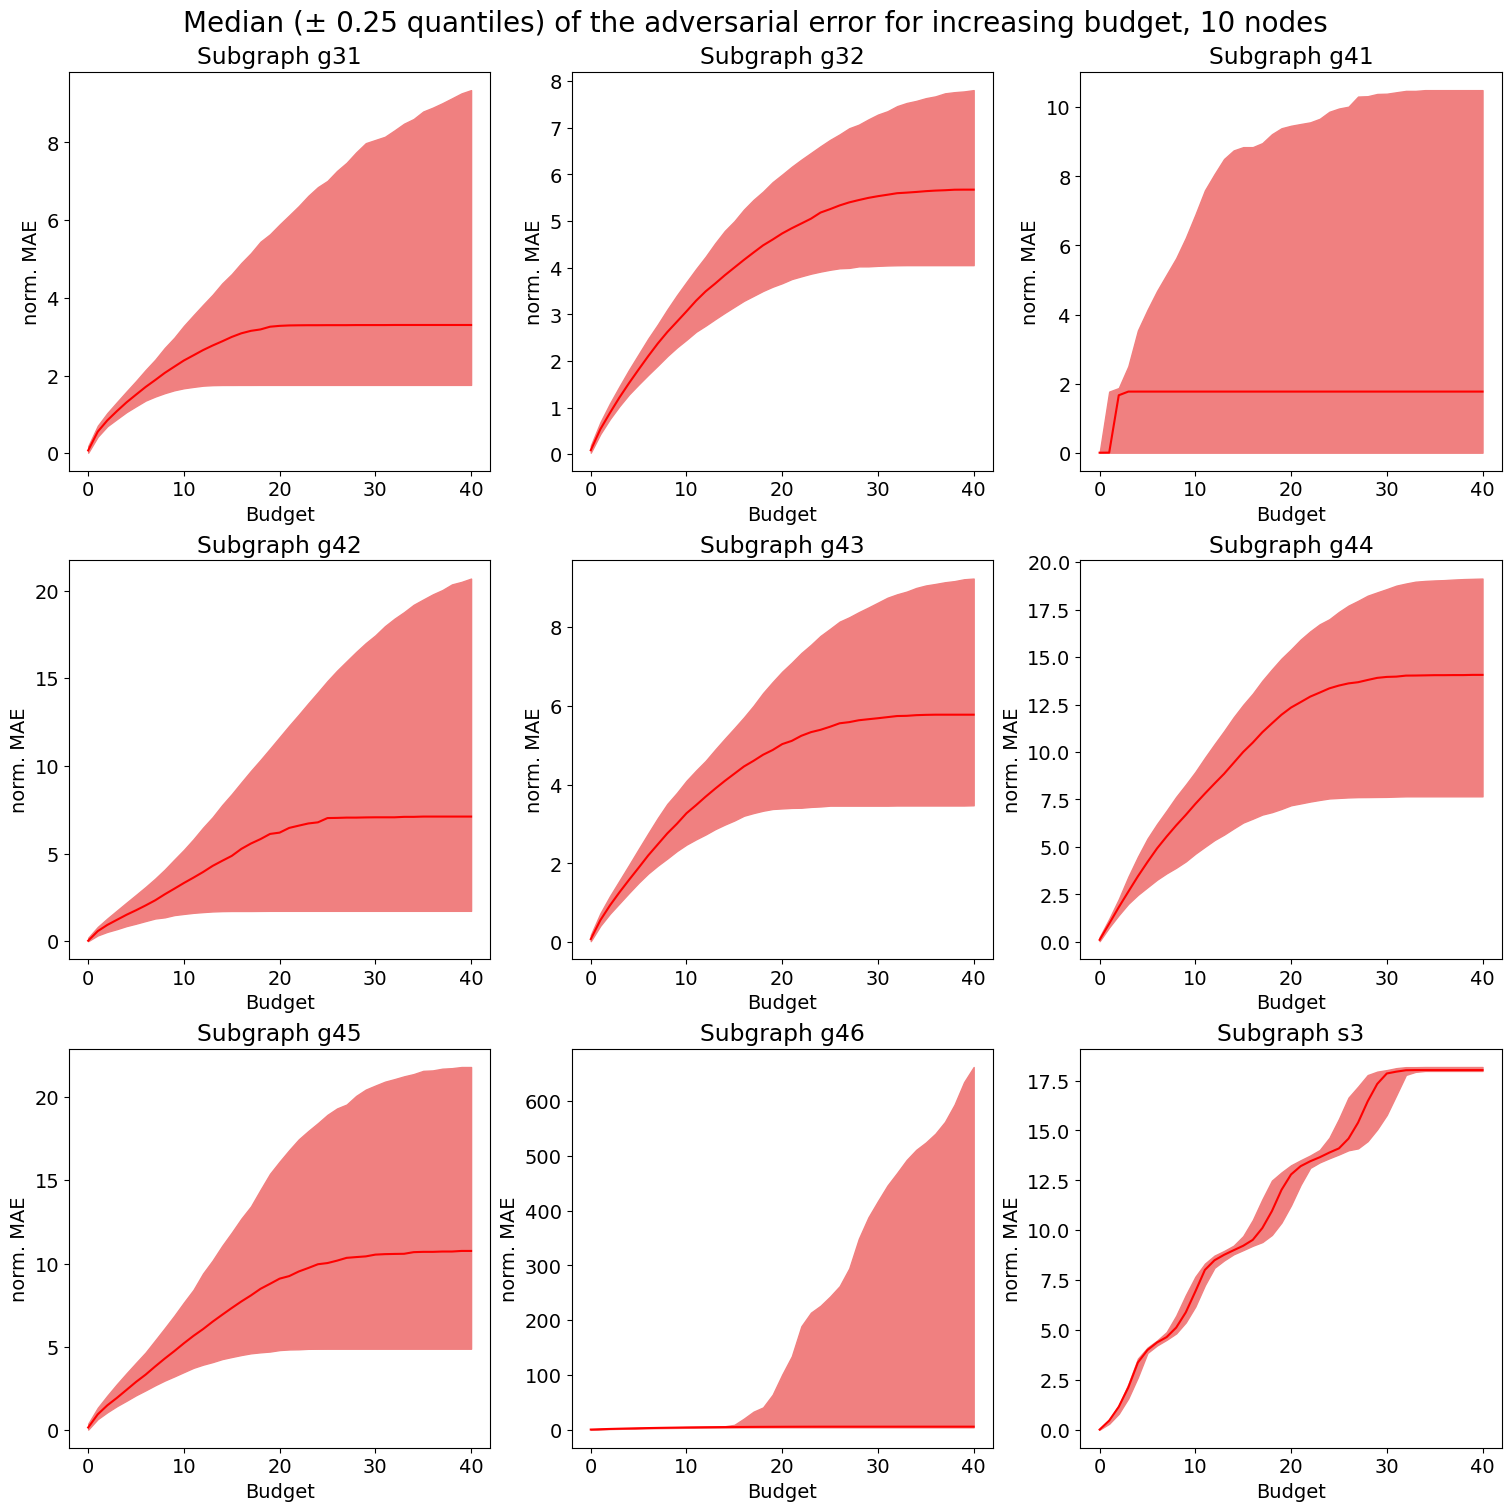

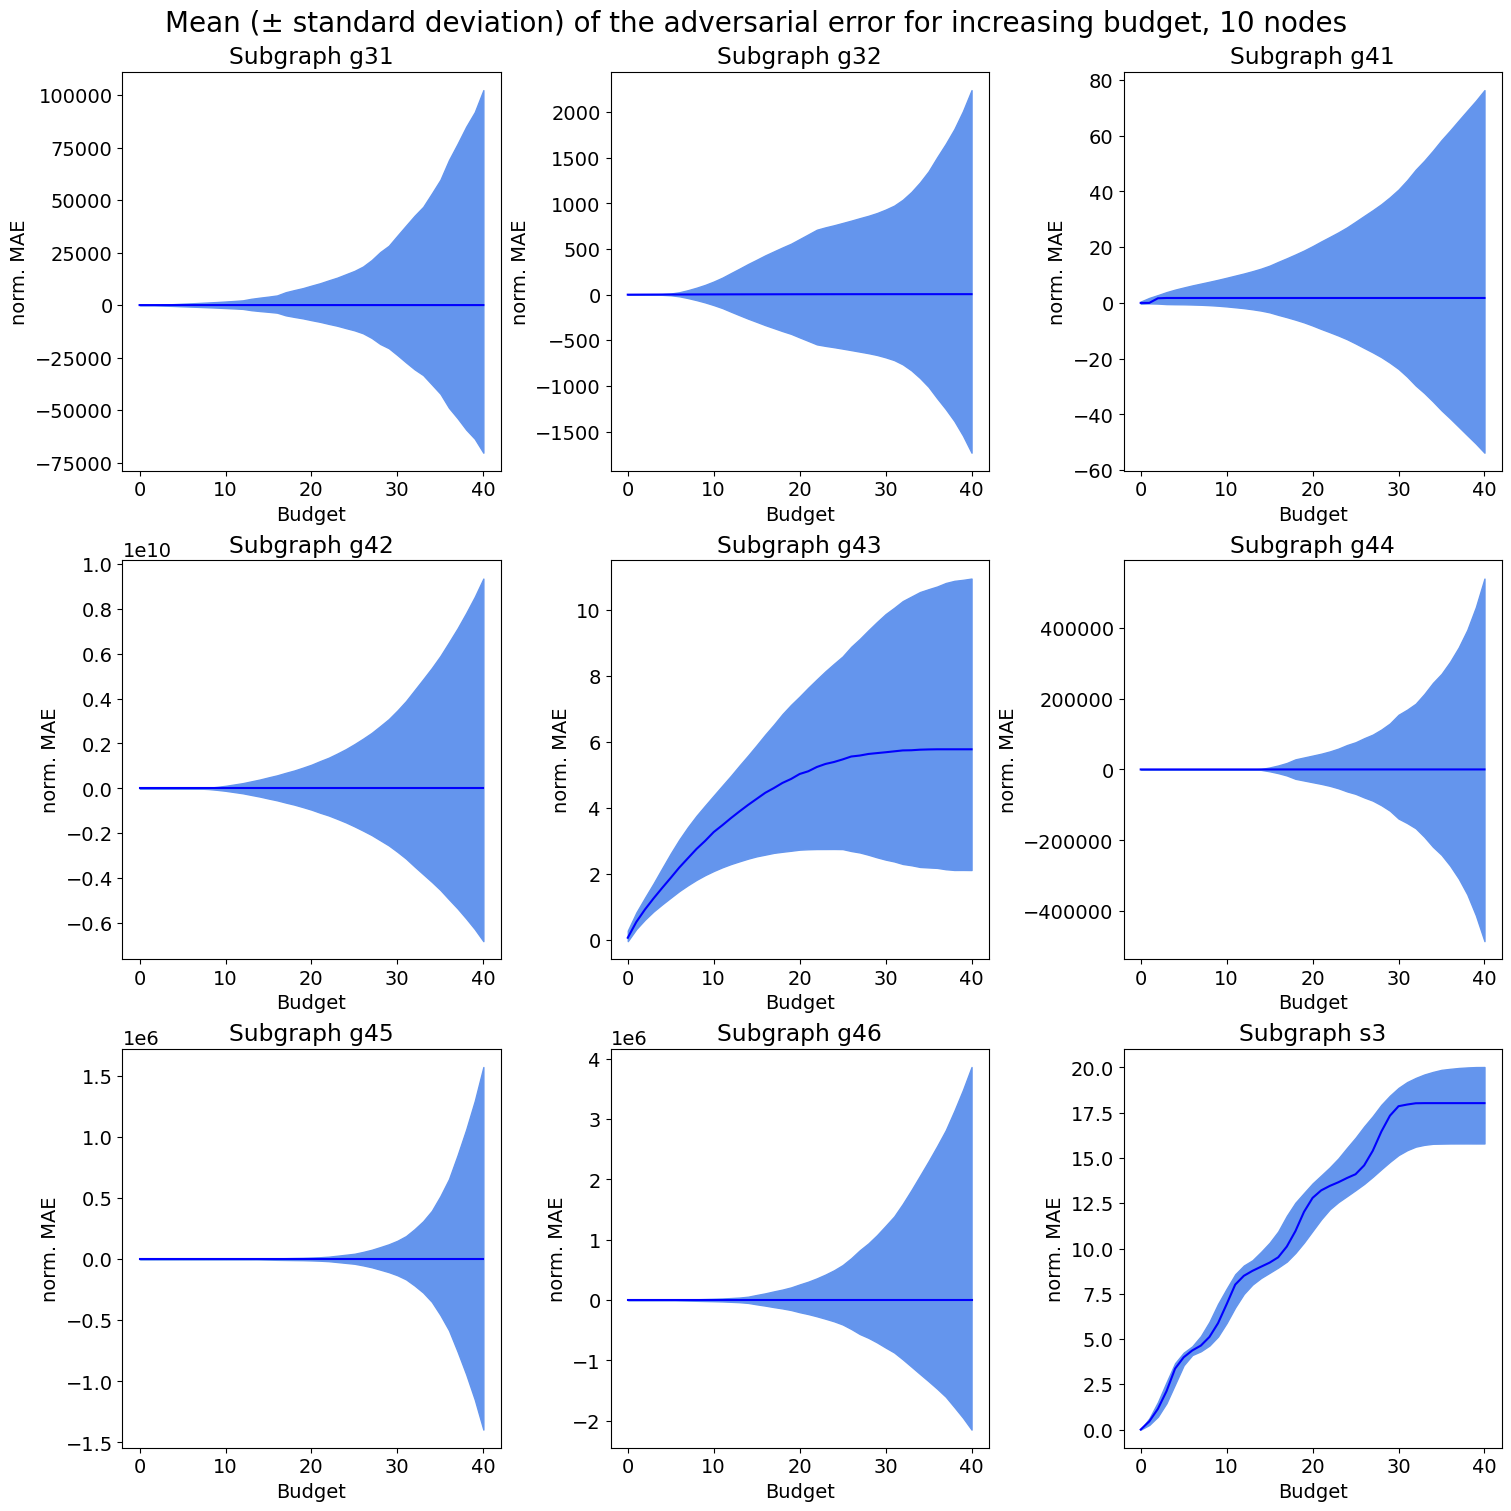

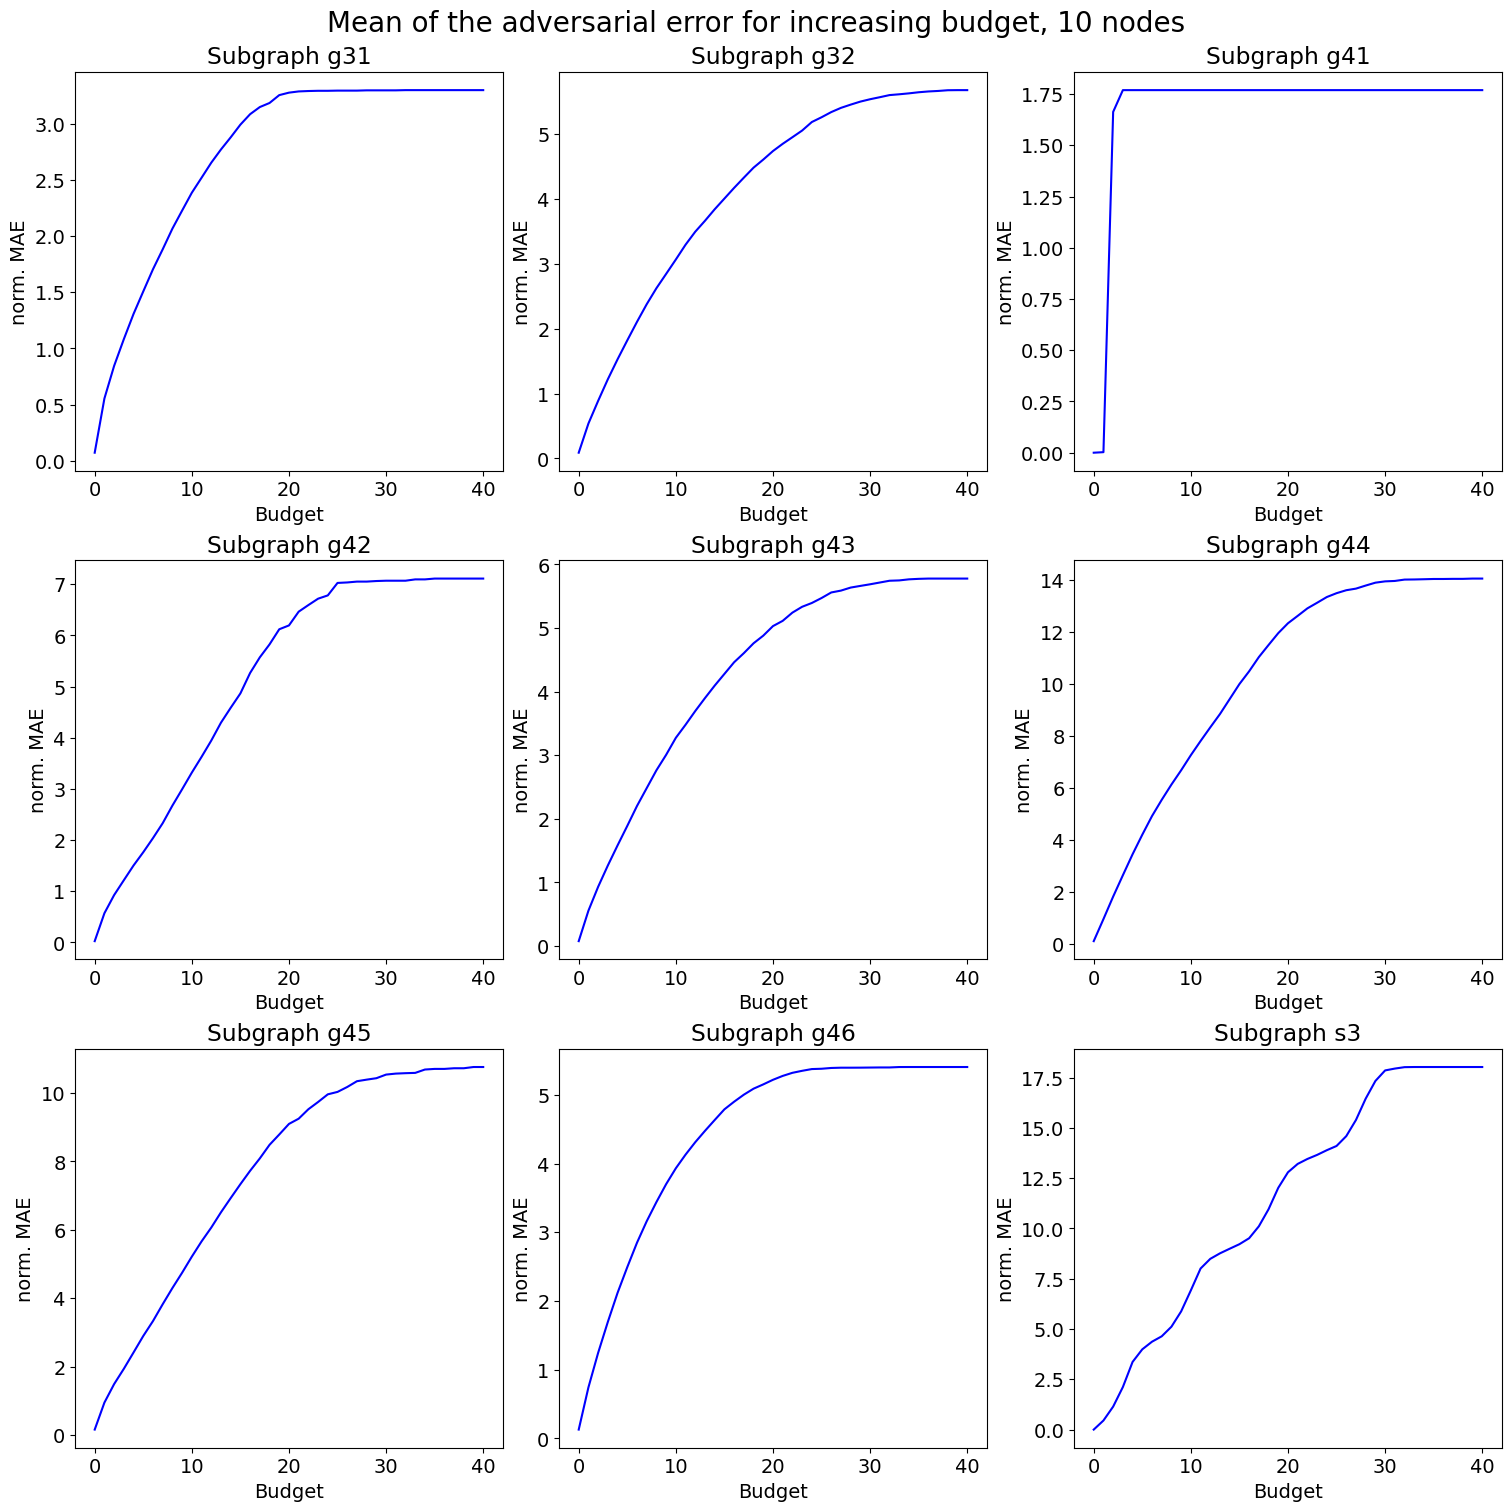

In [ ]:
# generate a column for each budget step
budget = results_10["config.budget"].iloc[0]
subgraphs = results_10["Subgraph"].unique()
fig_1, axes_1 = plt.subplots(3,3,constrained_layout=True)
fig_1.set_figwidth(15)
fig_1.set_figheight(15)
fig_1.suptitle("Median (± 0.25 quantiles) of the adversarial error for increasing budget, 10 nodes", fontsize = 20)
fig_2, axes_2 = plt.subplots(3,3, constrained_layout=True)
fig_2.set_figwidth(15)
fig_2.set_figheight(15)
fig_2.suptitle("Mean (± standard deviation) of the adversarial error for increasing budget, 10 nodes", fontsize = 20)
fig_3, axes_3 = plt.subplots(3,3, constrained_layout=True)
fig_3.set_figwidth(15)
fig_3.set_figheight(15)
fig_3.suptitle("Mean of the adversarial error for increasing budget, 10 nodes", fontsize = 20)
for j, subgraph in enumerate(subgraphs):
    results_10_s = results_10[results_10["Subgraph"] == subgraph]
    err_mean = np.empty(budget+1, dtype=float)
    err_median = np.empty(budget+1, dtype=float)
    err_high_quant = np.empty(budget+1, dtype=float)
    err_low_quant = np.empty(budget+1, dtype=float)
    err_std = np.empty(budget+1, dtype=float)
    for i in range(budget+1):
        err = results_10_s['result.adversarial_error_history'].apply(lambda l: l[min(i, len(l)-1)])
        err_mean[i] = err.mean()
        err_median[i] = err.median()
        err_std[i] = err.std()
        err_high_quant[i] = err.quantile(0.75)
        err_low_quant[i] = err.quantile(0.25)
    x = list(range(budget+1))
    # median 
    axes_1[j//3][j%3].plot(x, err_median, color = 'r')
    axes_1[j//3][j%3].fill_between(x, err_high_quant, err_low_quant, color = 'lightcoral')
    axes_1[j//3][j%3].set_xlabel('Budget')
    axes_1[j//3][j%3].set_ylabel(loss_name)
    axes_1[j//3][j%3].set_title(f'Subgraph {subgraph}')
    axes_1[j//3][j%3]
    # mean ± standard deviation
    axes_2[j//3][j%3].plot(x, err_median, color = 'b')
    axes_2[j//3][j%3].fill_between(x, err_mean + err_std, err_mean - err_std, color = 'cornflowerblue')
    axes_2[j//3][j%3].set_xlabel('Budget')
    axes_2[j//3][j%3].set_ylabel(loss_name)
    axes_2[j//3][j%3].set_title(f'Subgraph {subgraph}')
    # mean
    axes_3[j//3][j%3].plot(x, err_median, color = 'b')
    axes_3[j//3][j%3].set_xlabel('Budget')
    axes_3[j//3][j%3].set_ylabel(loss_name)
    axes_3[j//3][j%3].set_title(f'Subgraph {subgraph}')
plt.show()
    



Some graphs have extremely off predictions, see how they look like

Index(['_id', 'config.overwrite', 'config.db_collection',
       'config.adversarial_graphs_folder', 'config.adversarial_strategy',
       'config.budget', 'config.dataset_path', 'config.device',
       'config.edge_addition', 'config.edge_deletion', 'config.graph_id',
       'config.loss', 'config.model_architecture', 'config.models_path',
       'config.n_seeds', 'config.seed', 'config.subgraph', 'result.dataset',
       'result.graph', 'result.architecture', 'Subgraph', 'result.seed',
       'Test', 'Adversarial', 'result.adversarial_error_history',
       'result.cross_adversarial_errors', 'Cross adversarial',
       'result.test_prediction', 'result.adversarial_prediction',
       'result.test_count', 'result.adversarial_count', 'Adversarial budg. 5',
       'Adversarial budg. 10'],
      dtype='object')
       result.adversarial_prediction  result.adversarial_count Subgraph
66669                       1.934621                     -19.0      g45
62226                       4.15315

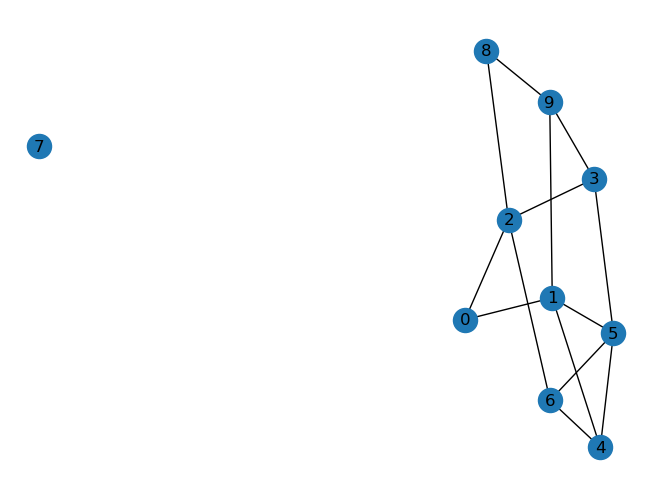

3


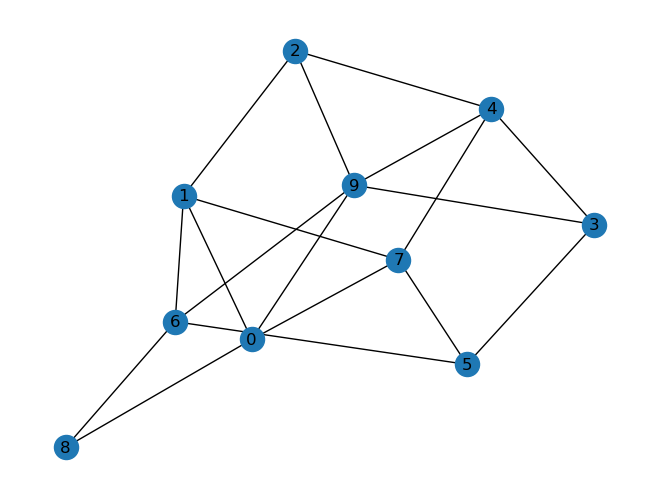

3


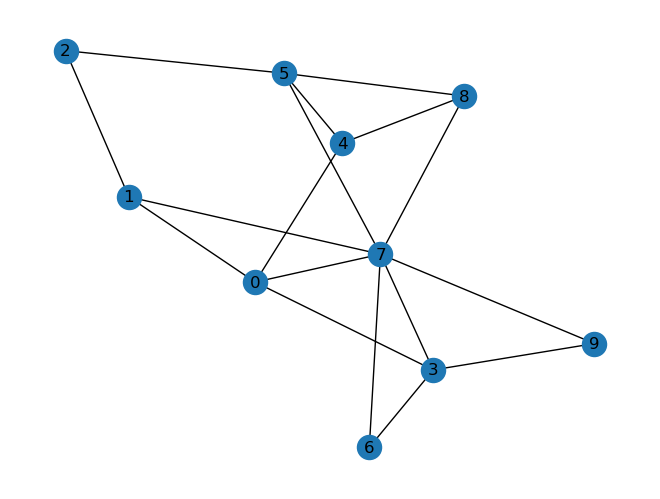

6


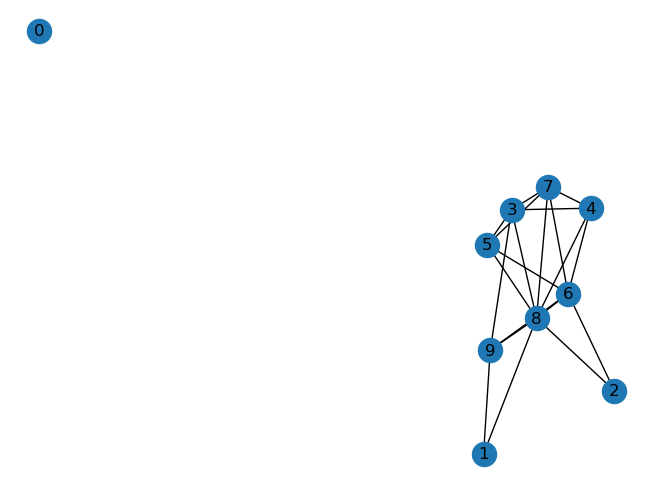

4


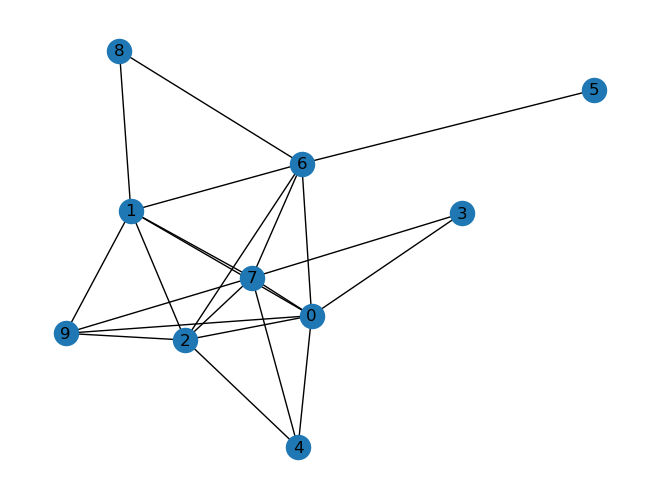

10


In [ ]:
import networkx as nx

results_10_3 = results_10.sort_values(by="result.adversarial_count", ascending=True).head(20)
print(results_10_3.columns)
print(results_10_3[["result.adversarial_prediction", "result.adversarial_count", "Subgraph"]])
graphs_folder = "/nfs/students/campi/adversarial_graphs/GIN_er_10/"
for i in range(5):
    line = results_10_3.iloc[i]
    graph = f"{line['result.architecture']}_{line['result.graph']}_{line['Subgraph']}_{line['result.seed']}.npy"
    graph = np.load(graphs_folder + graph, allow_pickle = True)
    graph = nx.from_numpy_array(graph[0])
    nx.draw(graph, with_labels=True)
    plt.show()
    print(subgraph_counting(graph, line['Subgraph']))

## Graph properties of the adversarial graphs

Might be interesting to see if the adversarial graphs have specific structural properties

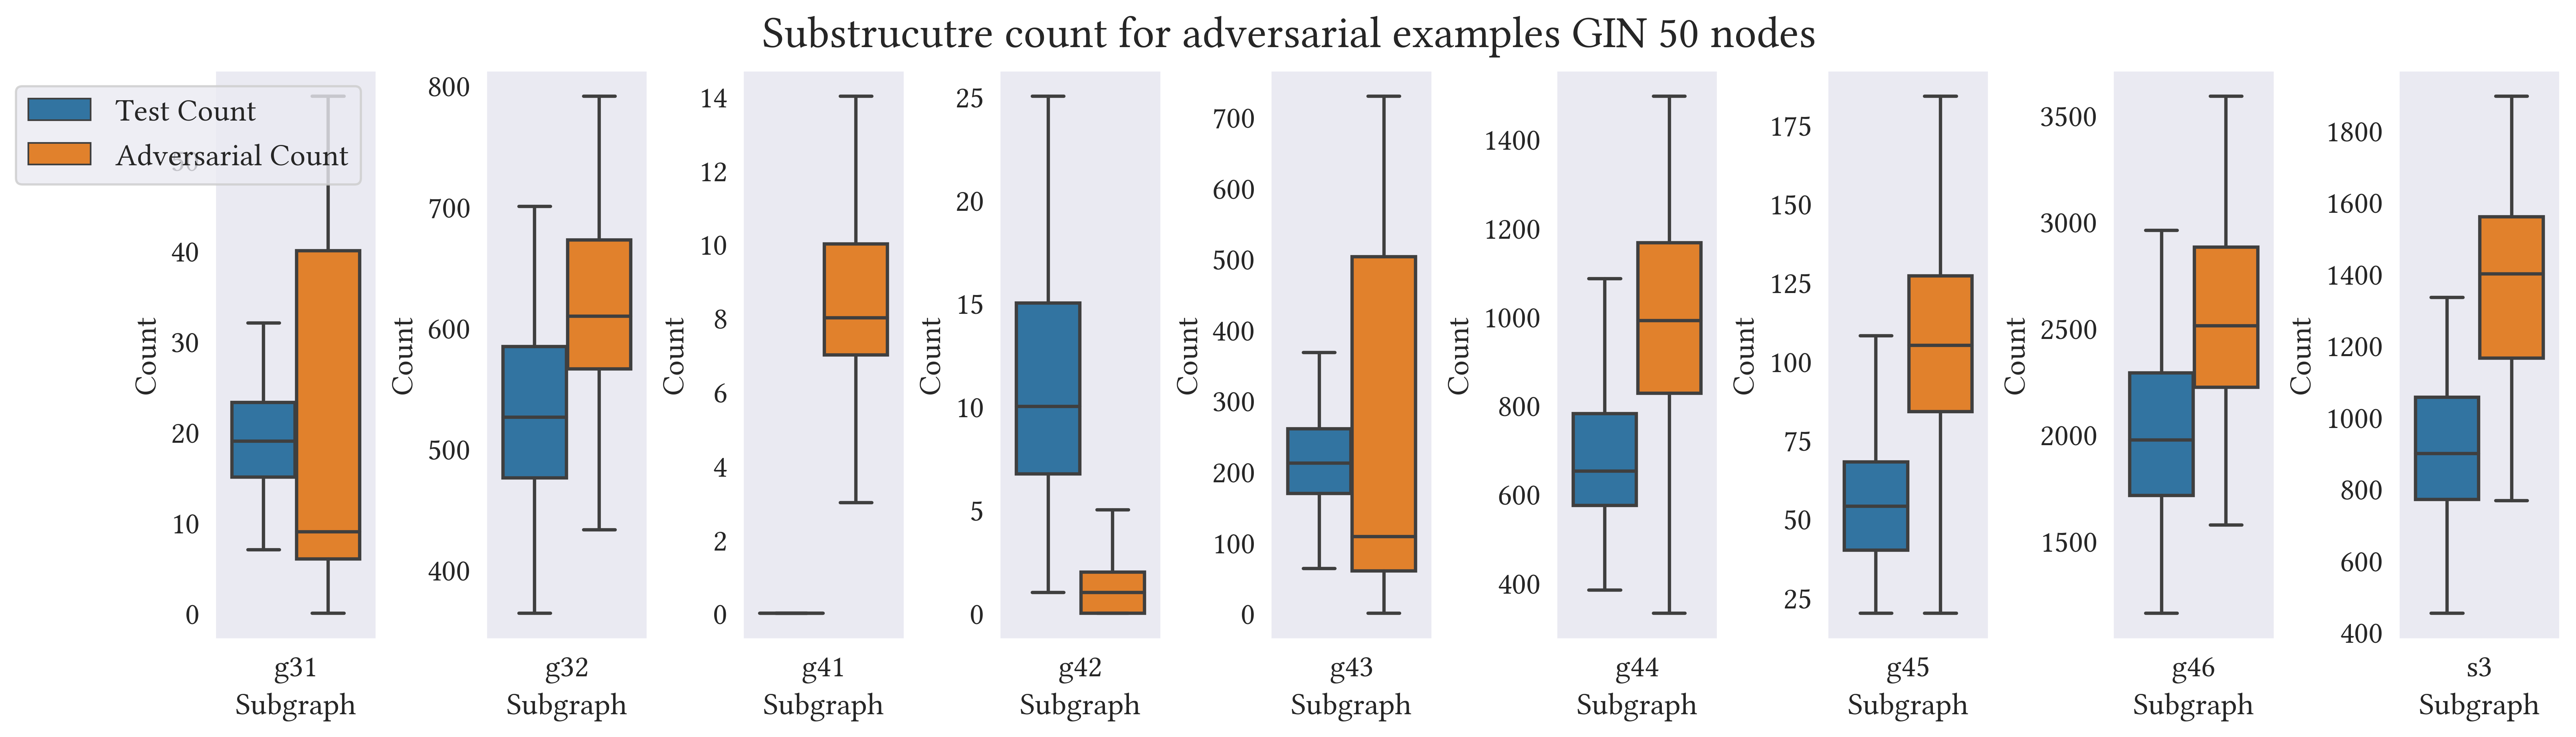

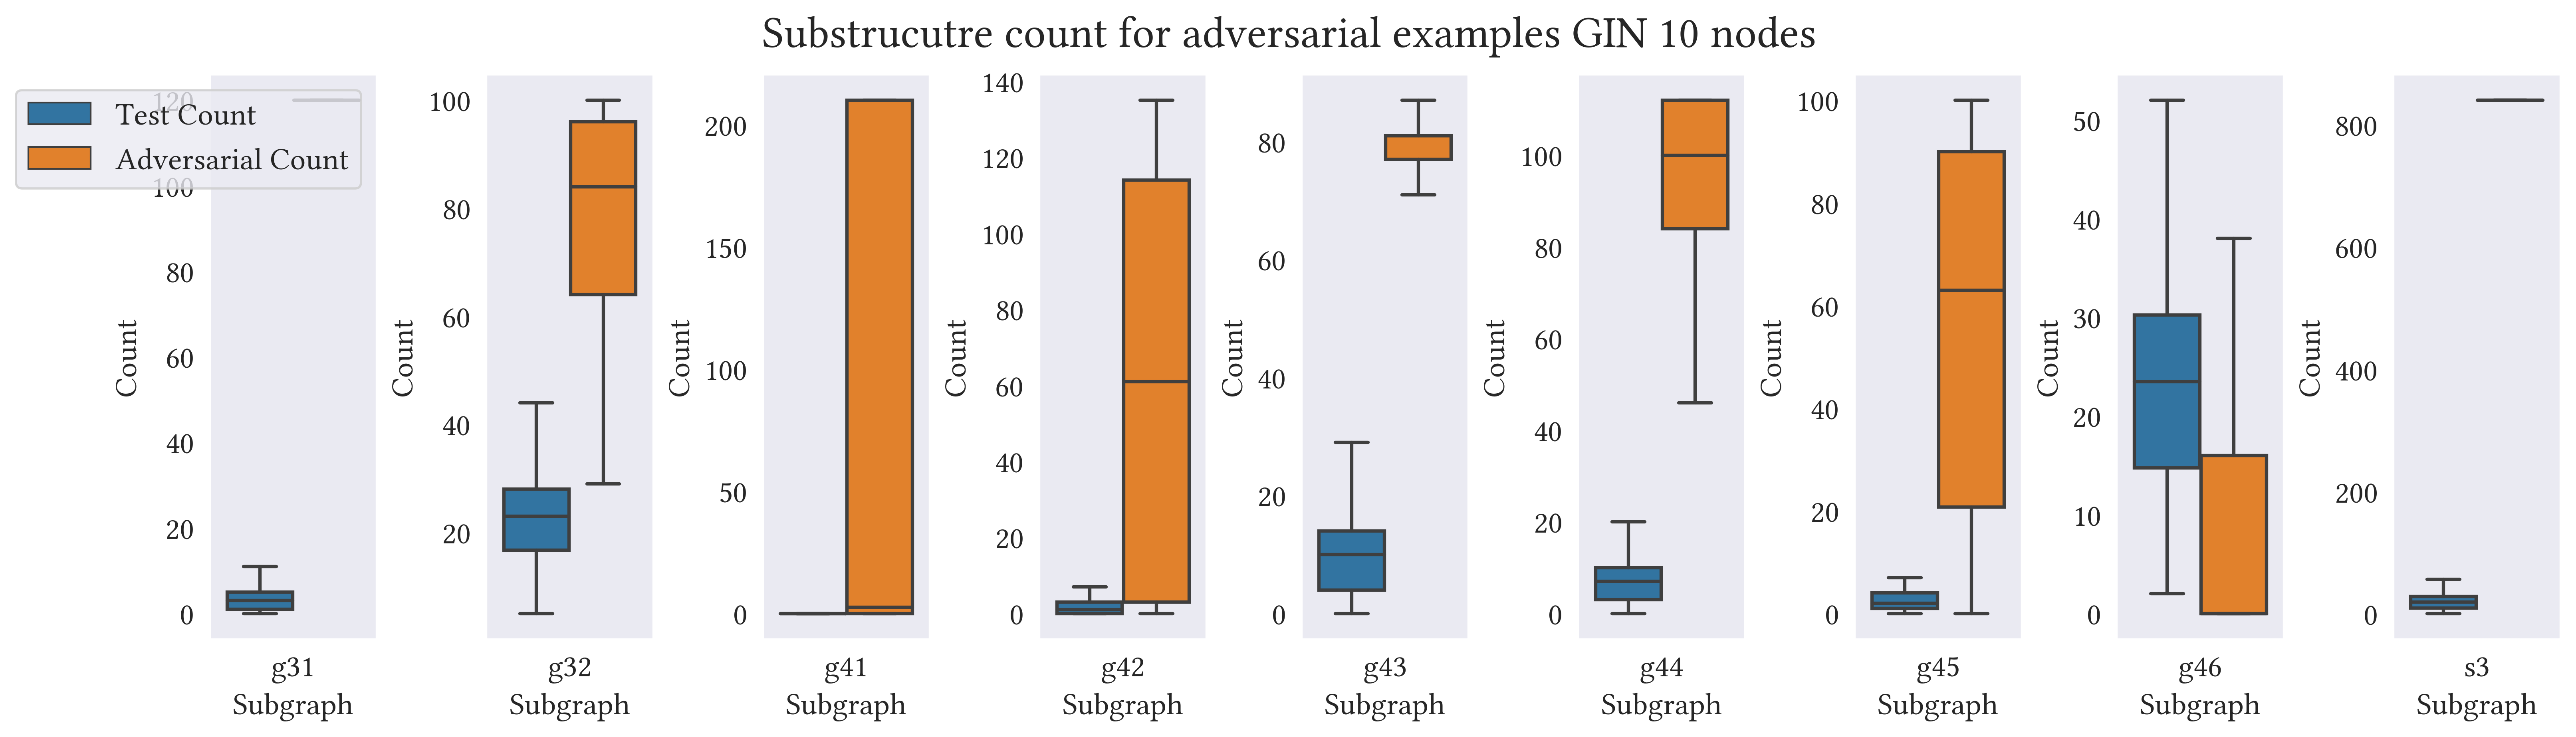

In [ ]:
#50 nodes
subgraphs = results_50["Subgraph"].unique()
results_50_temp = results_50
results_50_temp = results_50_temp.rename(columns={'result.test_count': 'Test Count', 'result.adversarial_count': 'Adversarial Count'})
results_50_temp = pd.melt(frame=results_50_temp, id_vars=["result.graph", 'Subgraph', 'result.seed', 'result.architecture'], value_vars=['Test Count', 'Adversarial Count'], var_name='Dataset', value_name='Count')
fig, axes = plt.subplots(1, len(subgraphs), constrained_layout=True)
fig.set_figwidth(16)
fig.set_figheight(4.5)
fig.set_dpi(400)
fig.suptitle("Substrucutre count for adversarial examples GIN 50 nodes", fontsize = 20)

for i, subgraph in enumerate(subgraphs):
    data = results_50_temp[results_50_temp['Subgraph']==subgraph]
    
    sns.violinplot(data=data, x="Subgraph", y='Count', hue='Dataset', showfliers = False, ax=axes[i], )
    #sns.despine()
    if i != 0:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(loc=1)


plt.show()

# 10 nodes
subgraphs = results_10["Subgraph"].unique()
results_10_temp = results_10
results_10_temp = results_10_temp.rename(columns={'result.test_count': 'Test Count', 'result.adversarial_count': 'Adversarial Count'})
results_10_temp = pd.melt(frame=results_10_temp, id_vars=["result.graph", 'Subgraph', 'result.seed', 'result.architecture'], value_vars=['Test Count', 'Adversarial Count'], var_name='Dataset', value_name='Count')
fig, axes = plt.subplots(1, len(subgraphs), constrained_layout=True)
fig.set_figwidth(16)
fig.set_figheight(4.5)
fig.set_dpi(400)
fig.suptitle("Substrucutre count for adversarial examples GIN 10 nodes", fontsize = 20)

for i, subgraph in enumerate(subgraphs):
    data = results_10_temp[results_10_temp['Subgraph']==subgraph]
    
    sns.violinplot(data=data, x="Subgraph", y='Count', hue='Dataset', showfliers = False, ax=axes[i], )
    #sns.despine()
    if i != 0:
        axes[i].get_legend().remove()
    else:
        axes[i].legend(loc=1)


plt.show()

https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/